# Resolução Checkpoint

## Módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Dados

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/22,3/26/22,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,177321,177321,177520,177602,177658,177716,177747,177782,177803,177827
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,273318,273387,273432,273432,273529,273608,273677,273759,273823,273870
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265612,265621,265629,265641,265651,265662,265671,265679,265684,265691
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,39713,39713,39713,39713,39713,40024,40024,40024,40024,40024
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99102,99106,99115,99115,99138,99138,99169,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,655468,655468,655468,655750,655750,655750,655750,655750,655750,655750
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11803,11803,11803,11803,11803,11805,11806,11806,11806,11806
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,316422,316501,316550,316550,316550,316550,316850,316941,317031,317031


## Ajustar dados

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province", 
                                   "Country/Region": "country"}, 
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province", 
                                        "Country/Region": "country"}, 
                               inplace=True)

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                             var_name = 'date', 
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                                       var_name = 'date', 
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid.head()

,province,country,Lat,Long,date,infected
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar as datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'], 
                                            infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], 
                                                 infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

In [ ]:
dados_paises_covid_dead.head()

,province,country,Lat,Long,date,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0


- Juntar as tabelas

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead, 
                       on = ['province', 'country',	'Lat',	'Long',	'date'], 
                       how = 'inner')

In [ ]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


## Questão 1

In [ ]:
dados_covid.shape

(228052, 7)

In [ ]:
len(dados_covid['country'].unique()) - 4, len(dados_covid['country'].unique()) - 5

(194, 193)

In [ ]:
dados_covid['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

## Questão 2

In [ ]:
paises_selecionados = ['Brazil', 'Italy', 'US']

In [ ]:
data_max = np.max(dados_covid['date'])
data_max

Timestamp('2022-04-03 00:00:00')

In [ ]:
dados_covid[(dados_covid['country'].isin(paises_selecionados)) & \
            (dados_covid['date'] == data_max)]

,province,country,Lat,Long,date,infected,dead
227799,NaN,Brazil,-14.23500,-51.92530,2022-04-03,30002785,660410
227922,NaN,Italy,41.87194,12.56738,2022-04-03,14845815,159784
228024,NaN,US,40.00000,-100.00000,2022-04-03,80155397,982565


## Questão 3

In [ ]:
data_max = np.max(dados_covid['date'])
data_max

Timestamp('2022-04-03 00:00:00')

In [ ]:
dados_filtrados = dados_covid[dados_covid['date'] == data_max].reset_index(drop=True)

In [ ]:
paises_agrupados = dados_filtrados.groupby('country') \
               .agg(infected = pd.NamedAgg('infected', 'sum'),
                    dead = pd.NamedAgg('dead', 'sum')) \
               .reset_index()

In [ ]:
paises_agrupados.sort_values('infected', ascending = False).head(10)

,country,infected,dead
183,US,80155397,982565
80,India,43029044,521358
24,Brazil,30002785,660410
63,France,26186606,143540
67,Germany,21706329,130052
187,United Kingdom,21379545,166168
145,Russia,17636019,362304
182,Turkey,14894731,98157
86,Italy,14845815,159784
93,"Korea, South",14001406,17453


In [ ]:
paises_agrupados.sort_values('dead', ascending = False).head(10)

,country,infected,dead
183,US,80155397,982565
24,Brazil,30002785,660410
80,India,43029044,521358
145,Russia,17636019,362304
116,Mexico,5666215,323223
139,Peru,3548559,212328
187,United Kingdom,21379545,166168
86,Italy,14845815,159784
81,Indonesia,6015748,155164
63,France,26186606,143540


## Questão 4

In [ ]:
data_max = np.max(dados_covid['date'])
data_max

Timestamp('2022-04-03 00:00:00')

In [ ]:
dados_filtrados = dados_covid[dados_covid['date'] == data_max].reset_index(drop=True)

In [ ]:
paises_agrupados = dados_filtrados.groupby('country') \
               .agg(infected = pd.NamedAgg('infected', 'sum'),
                    dead = pd.NamedAgg('dead', 'sum')) \
               .reset_index()

In [ ]:
paises_agrupados['mort_rate'] = paises_agrupados['dead'] / paises_agrupados['infected']

In [ ]:
paises_agrupados.sort_values('mort_rate', ascending = False).head(11)

,country,infected,dead,mort_rate
106,MS Zaandam,9,2,0.222222
195,Yemen,11806,2143,0.181518
167,Sudan,61955,4907,0.079203
139,Peru,3548559,212328,0.059835
116,Mexico,5666215,323223,0.057044
172,Syria,55711,3144,0.056434
162,Somalia,26410,1361,0.051534
54,Egypt,505264,24417,0.048325
0,Afghanistan,177827,7671,0.043137
22,Bosnia and Herzegovina,375554,15718,0.041853


## Questão 5

a) Infectados Brasil, USA

In [ ]:
dados_covid_resumo = dados_covid.groupby(['date', 'country']) \
           .agg(infected = pd.NamedAgg('infected', 'sum'),
                dead = pd.NamedAgg('dead', 'sum')) \
            .reset_index()

In [ ]:
paises_selecionados = ['Brazil', 'US']

In [ ]:
dados_filtrados = dados_covid_resumo[dados_covid_resumo['country'].isin(paises_selecionados)]

In [ ]:
dados_filtrados.head()

,date,country,infected,dead
24,2020-01-22,Brazil,0,0
183,2020-01-22,US,1,0
222,2020-01-23,Brazil,0,0
381,2020-01-23,US,1,0
420,2020-01-24,Brazil,0,0


In [ ]:
dados_filtrados = dados_filtrados.pivot(index = 'date', 
                                        columns = 'country', 
                                        values = 'infected')

In [ ]:
dados_filtrados.head()

country,Brazil,US
date,,
2020-01-22,0,1
2020-01-23,0,1
2020-01-24,0,2
2020-01-25,0,2
2020-01-26,0,5


Text(0.5, 1.0, 'Comparativo Brasil  x EUA')

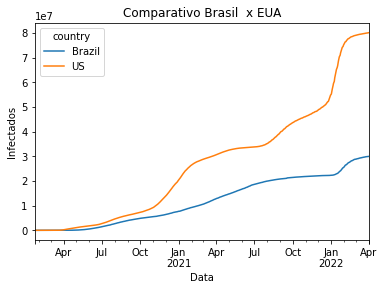

In [ ]:
ax = dados_filtrados.plot.line()
plt.xlabel('Data')
plt.ylabel('Infectados')
plt.title('Comparativo Brasil  x EUA')

b) Evolução mortalidade

In [ ]:
dados_covid_resumo = dados_covid.groupby(['date', 'country']) \
           .agg(infected = pd.NamedAgg('infected', 'sum'),
                dead = pd.NamedAgg('dead', 'sum')) \
            .reset_index()

In [ ]:
paises_selecionados = ['Brazil', 'US']

In [ ]:
dados_filtrados = dados_covid_resumo[dados_covid_resumo['country'].isin(paises_selecionados)]

In [ ]:
dados_filtrados = dados_filtrados.pivot(index = 'date', 
                                        columns = 'country', 
                                        values = 'dead')

In [ ]:
dados_filtrados

country,Brazil,US
date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2022-03-30,659769,980130
2022-03-31,660022,980638
2022-04-01,660265,982371


Text(0.5, 1.0, 'Comparativo Brasil  x EUA')

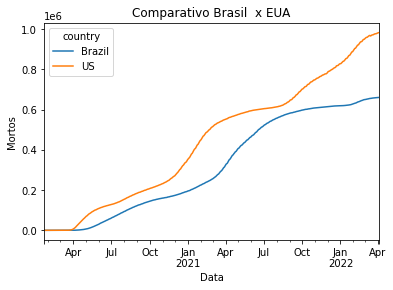

In [ ]:
ax = dados_filtrados.plot.line()
plt.xlabel('Data')
plt.ylabel('Mortos')
plt.title('Comparativo Brasil  x EUA')

c) Gráfico de barras BR x US

In [ ]:
paises_selecionados = ['Brazil', 'US']
data = '2022-03-20'

In [ ]:
dados_paises_filtrados = dados_covid_resumo[(dados_covid_resumo['date'] == data) & \
                                            (dados_covid_resumo['country'].isin(paises_selecionados))].reset_index(drop=True)

In [ ]:
dados_paises_filtrados

,date,country,infected,dead
0,2022-03-20,Brazil,29637814,657495
1,2022-03-20,US,79741860,971598


Text(0.5, 1.0, 'Infectados Brasil x EUA em 2022-03-20')

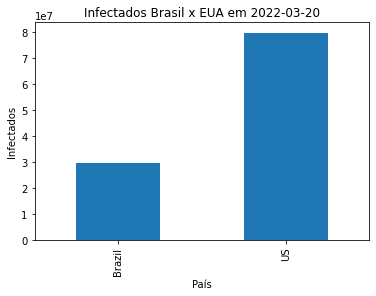

In [ ]:
ax = dados_paises_filtrados.plot.bar(x = 'country', y = 'infected', legend = None)
plt.xlabel('País')
plt.ylabel('Infectados')
plt.title('Infectados Brasil x EUA em '+str(data))

d) Barras mortes

Text(0.5, 1.0, 'Mortos Brasil x EUA em 2022-03-20')

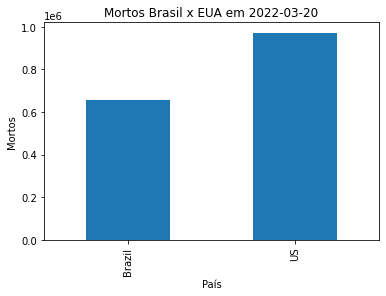

In [ ]:
ax = dados_paises_filtrados.plot.bar(x = 'country', y = 'dead', legend = None)
plt.xlabel('País')
plt.ylabel('Mortos')
plt.title('Mortos Brasil x EUA em '+str(data))

e) Barras taxa mortalidade

In [ ]:
dados_paises_filtrados['mort_rate'] = (dados_paises_filtrados['dead'] / dados_paises_filtrados['infected']) * 100

Text(0.5, 1.0, 'Taxa Brasil x EUA em 2022-03-20')

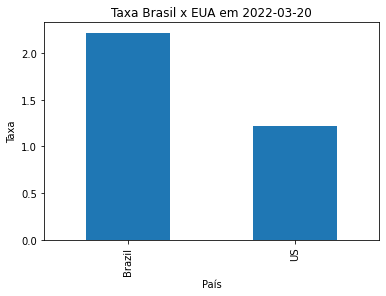

In [ ]:
ax = dados_paises_filtrados.plot.bar(x = 'country', y = 'mort_rate', legend = None)
plt.xlabel('País')
plt.ylabel('Taxa')
plt.title('Taxa Brasil x EUA em '+str(data))